<h1><center>Homework 3</center></h1>

<h3>Submission Instructions</h3>
<p>
For submission, you only need to submit your Jupyter Notebook file named "StudentName_ID.ipynb"

If you have any questions, you can contact me via kamard@itu.edu.tr
</p>

<h3> Homework Instructions </h3>

<p>In this homework, you will implement Girvan-Newman algorithm, and use the algorithm to decompose the network into a number of modules so that it has the highest modularity. Remember the steps of Girvan-Newman algorithm from Graph Theory Blink 9.3:

<ol>
  <li>Calculate the betweenness centrality of each edge in graph G</li>
  <li>Remove the edge with the highest betweenness centrality. Choose randomly in case same score occurs.</li>
  <li>Recalculate the betweenness centrality of all remaining edges</li>
  <li>Repeat steps 2 and 3 until no edges remain. </li>
</ol>

You will need to modify the above steps so that you find the number of connected components that has the highest modularity. To do that, you can calculate modularity each time new connected component is formed during the Girvan-Newman algorithm, and find the decomposition with highest modularity. Don't forget to compute the modularity of the initial network, as network might not consist any modules 

<h2>WHAT YOU NEED TO DO</h2>
<ol>
    <li> Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity <b>(20p)</b>
    <li> Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). <b>(60p)</b>
    <li>Apply the function on the given networks. Visualize the final results. Assign different colors to each node in the visualization. <b>(10p)</b>
    <li> What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. <b>(10p)</b>
    <li><b>BONUS</b> What are the key differences between Agglomerative Clustering and Divisive Clustering? Which one of these does the Girvan-Newman algorithm belong to? Explain.<b>(3p)</b> 

Below, I have given you some basic functions to start with. 
</p>

In [437]:
import numpy as np
import networkx as nx
import networkx.algorithms.community as nx_comm
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

You can use RandomGraph function to create a random graph that returns the graph as both networkx.Graph and adjacency matrix as numpy.array.

(Optional, will not affect your grade) You can modify the VisualiseGraph function to give each connected component different graph, or make other interesting visualizations. Play with it however you want!

In [438]:
def RandomAdjacencyMatrix(n = 10, p = 0.5):
    M = np.zeros((n,n), dtype=np.uint8)
    for i in range(n):
        for j in range(i+1, n):
            if np.random.rand() < p:
                M[i,j], M[j, i] = 1, 1
    return M

def RandomGraph(n = 10, p = 0.5):
    '''
    Creates a random networkx undirected, unweighted graph
    
    Inputs:
        n: number of nodes in graph
        p: probability of an edge being included
        
    Outputs:
        M: Adjacency matrix as numpy array
        G: nx Graph
        
    '''
    M = RandomAdjacencyMatrix(n, p)
    edges = np.transpose(np.where(M==1))
    
    G = nx.Graph()
    for i in range(edges.shape[0]):
        G.add_edge(edges[i, 0], edges[i, 1])
    
    return G, M

def VisualizeGraph(G):
    nx.draw_networkx(G)
    plt.show()
    

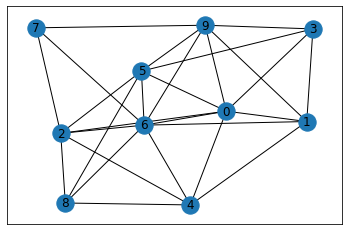

In [439]:
n = 10
p = 0.5
G, M = RandomGraph(n, p)
VisualizeGraph(G)

## You can start from here.

Implement all your codes and write all your comments below this cell. 

For the algorithm; you are only allowed to use networkx to compute <b>modularity, connected components and betwenness centralities.</b> You need to implement Girvan-Nerman and rest of the algorithm by yourself. 

### 1️⃣- Read and visualize the given graph adjacency matrix files. Give brief comments about the networks' hiearchy and modularity (20p)

##### Loading .npy files

In [440]:
network1_adj = np.load("NetworkData1.npy")
network2_adj = np.load("NetworkData2.npy")
network3_adj = np.load("NetworkData3.npy")

network_adjs = [network1_adj, network2_adj, network3_adj]
network_Gs = [nx.from_numpy_array(adj) for adj in network_adjs]

###### Visualizing the given networks

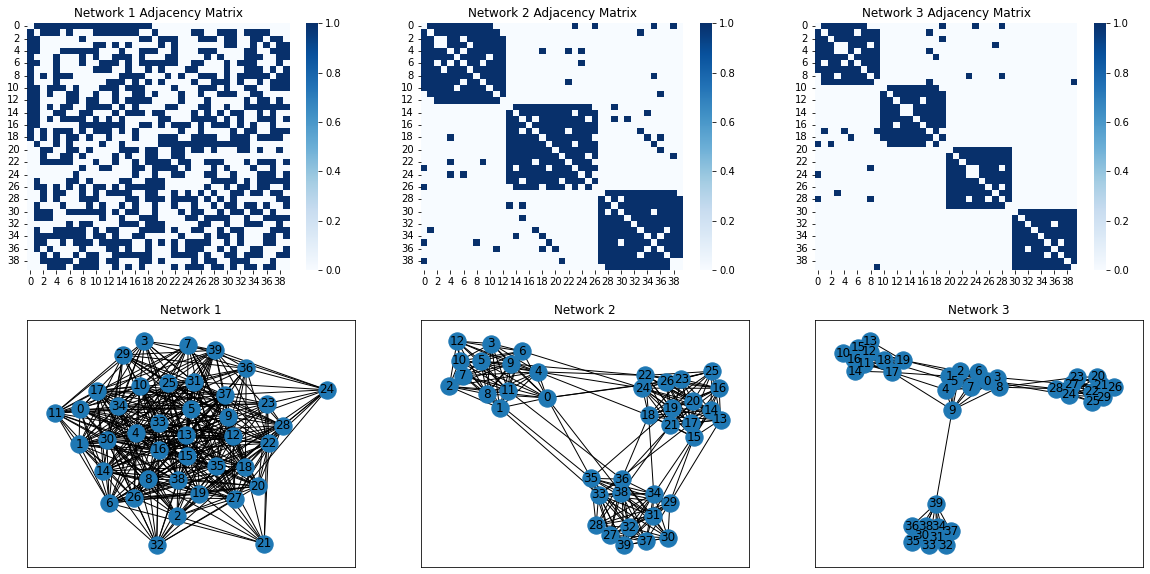

In [441]:
fig, ax = plt.subplots(2,3, figsize=(20, 10))

for i, adj in enumerate(network_adjs):
    ax[0,i].title.set_text("Network " + str(i+1) + " Adjacency Matrix")
    sns.heatmap(adj, cmap="Blues",ax=ax[0,i])
    ax[1,i].title.set_text("Network " + str(i+1))
    nx.draw_networkx(nx.from_numpy_matrix(adj), ax=ax[1,i])

plt.show()

As it can be seen from the visualization of the given networks, network 1 has no any dense subgroups whereas, network 2 and 3 have noticeable modules with high intrinsic connectivity with weaker extrinsic connectivity. We can affirm that by looking at the adjacency matrices, graph 1 is a non-modular, also, graph 2 and 3 have three and four modules, respectively. We can see the hiearchy in modules by checking the connectivity in them, where iteratively sub-modules can be found.

### 2️⃣- Implement the Girvan-Newman algorithm: Write a function that uses Girvan-Newman algorithm to find the number of connected components that gives the highest modularity. In the same function or another function, return the new graph with the number of connected components you have found (basically, remove edges until the number of connected components are equal to the one you found with your algorithm). (60p)

In [442]:
#REPEAT
#    LET n BE number of edges in the graph
#    FOR i=0 to n-1
#        LET B[i] BE betweenness centrality of edge i
#        IF B[i] > max_B THEN
#            max_B = B[i]
#            max_B_edge = i
#        ENDIF
#    ENDFOR
#    REMOVE edge i FROM graph
#UNTIL number of edges in graph is 0

In [443]:
def GirvanNewman(G):
    #input: NetworkX graph, G
    #Output: The new graph,the number of ConnectedComponents with highest modularity, the largest connected components
    A = nx.adjacency_matrix(G).todense() #adjacency matrix of reference graph
    
    Modularities = [] #Modulartiy values for each graph generated
    Graphs = [] #Each graph generated will be stored here.
   
    while G.number_of_edges() > 0: #until no edges remain
        
        #Calculate the betweenness centrality of each edge in graph G
        Betweenness = nx.edge_betweenness_centrality(G)
        
        # selecting the edge with high betweenness centrality value to remove (optinal: random)
        Max_Betweenness_Edge = max(Betweenness, key=Betweenness.get) 

        #Calculate the connected components of graph G
        ConnectedComponents = nx.connected_components(G)
        
        # Calculate the modularity by connected components 
        Modularity = nx_comm.modularity(nx.from_numpy_matrix(A), ConnectedComponents)
        Modularities.append(Modularity)
        
        Graphs.append(nx.Graph(G))
        
        # Removing the max betweenness edge
        G.remove_edge(*Max_Betweenness_Edge) 
        
    # OUTPUT 1: Graphs[ModularityValues.index(max(ModularityValues))] : The new graph 
    # OUTPUT 2: len(sorted(nx.connected_components(Graphs[ModularityValues.index(max(ModularityValues))]), key=len, reverse=True))
    #           The number of ConnectedComponents with highest modularity
    # OUTPUT 3: sorted(nx.connected_components(Graphs[Modularities.index(max(Modularities))])): the list of largest components to visualize the colors.
    return Graphs[Modularities.index(max(Modularities))], len(sorted(nx.connected_components(Graphs[Modularities.index(max(Modularities))]), key=len, reverse=True)), sorted(nx.connected_components(Graphs[Modularities.index(max(Modularities))]))


##### Girvan-Newman Algorithm with NetworkX for checking the accuracy of the new implemented Girvan-NewmanAlgorithm. <br> Source: **(https://memgraph.com/blog/community_detection-algorithms_with_python_networkx)

### 3️⃣ - Apply the function on the given networks. Visualize the final results. Assign different colors to each node in the visualization. (10p)

In [444]:
GN_results = []
for G in tqdm(network_Gs, desc="Girvan-Newman Algorithm Working..."):
    GN_results.append(GirvanNewman(G))

Girvan-Newman Algorithm Working...: 100%|█████████| 3/3 [00:03<00:00,  1.10s/it]


##### Assigning node colors for each girvan-neumann optimized networks.


In [445]:
colors = ['red', 'blue', 'green', 'yellow', 'black', 'orange', 'purple' , 'pink', 'olive', 'cyan' , 'navy', 'coral', 'darkblue', 'gold', 'gray',
         'brown', 'magenta', 'crimson', 'saddlebrown', 'salmon', 'chocolate', 'lightgreen', 'teal', 'orchid', 'skyblue', 'lime', 'darkred'] 
colorparts= []

for n,adj in enumerate(network_adjs):
    partitioning = {}

    index = 0;
    for com in GN_results[n][2]:
        for node in GN_results[n][0].nodes:
            if node in com:
                partitioning[node] = colors[index]
        index = index + 1
  
    colorparts.append(partitioning)
    index = 0;


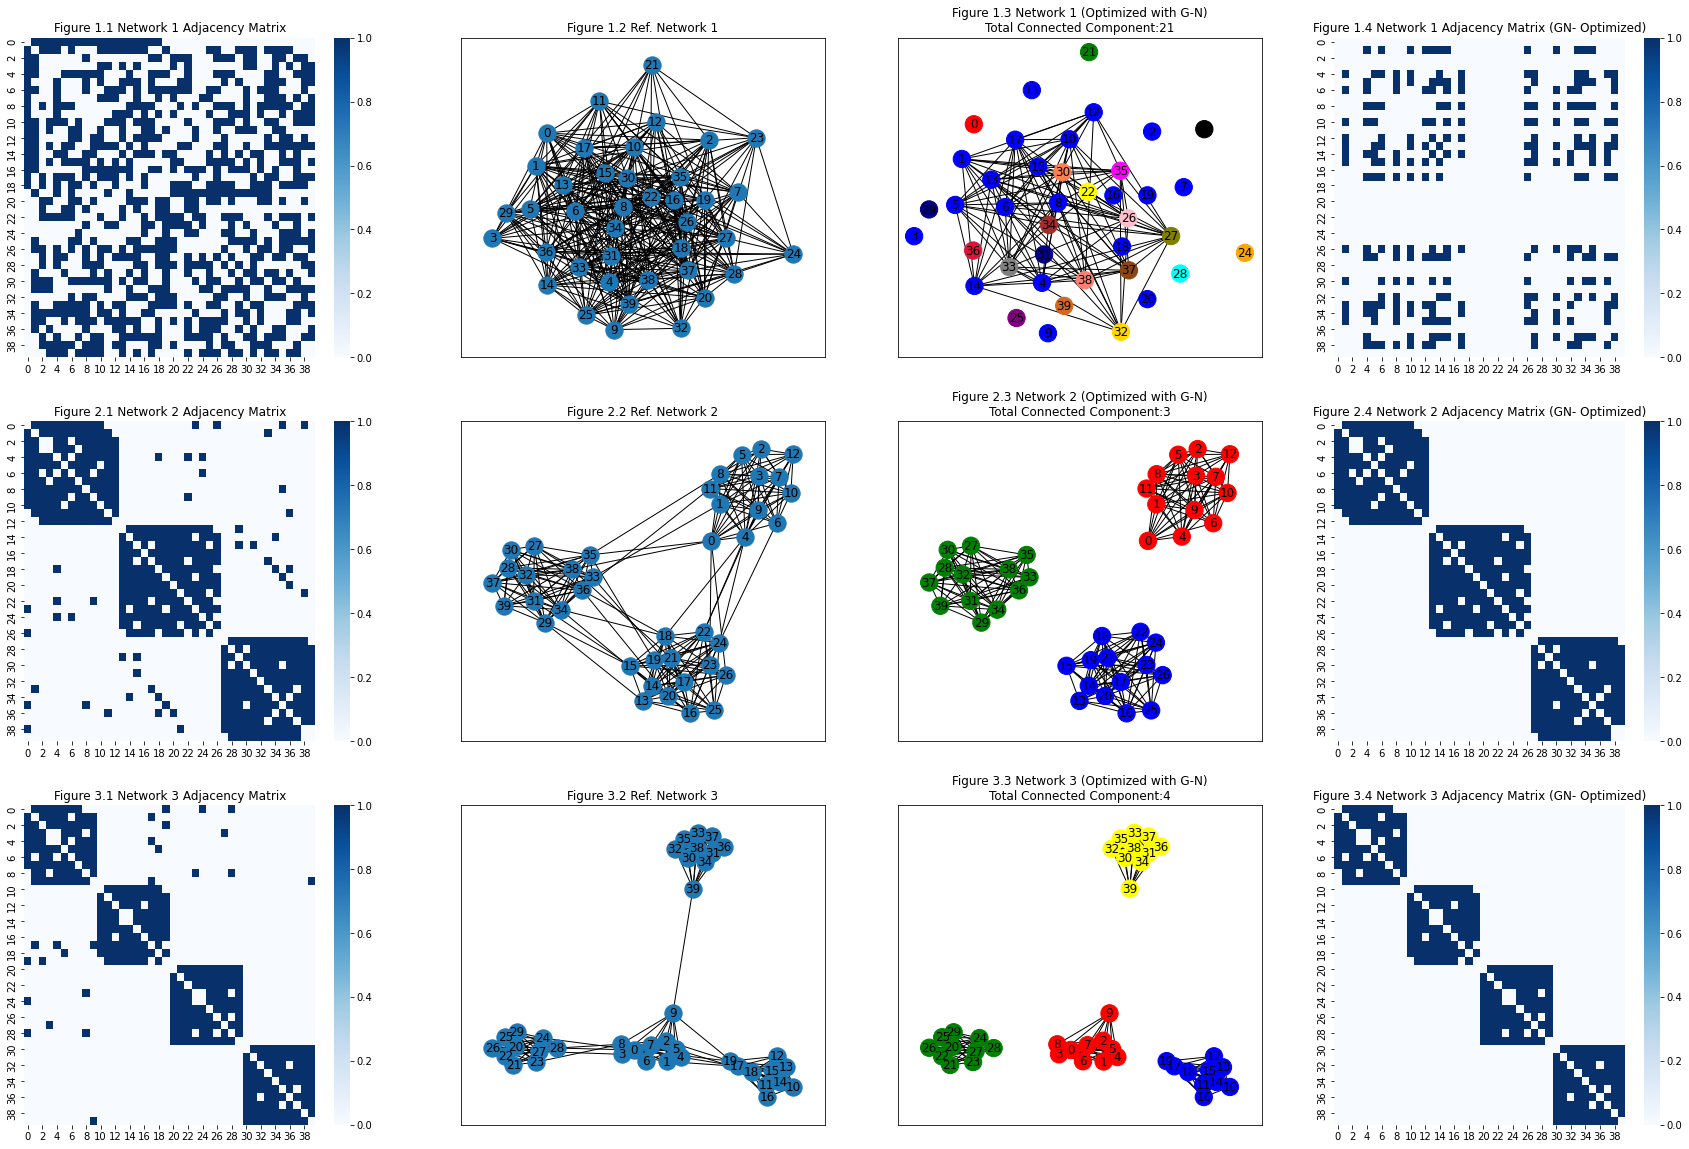

In [446]:
fig, ax = plt.subplots(3,4, figsize=(30, 20))

for i, adj in enumerate(network_adjs):
    pos = nx.spring_layout(nx.from_numpy_matrix(adj))
    ax[i,0].title.set_text("Figure " + str(i+1) + ".1 Network " + str(i+1) + " Adjacency Matrix")
    sns.heatmap(adj, cmap="Blues",ax=ax[i,0])
    ax[i,1].title.set_text("Figure " + str(i+1) + ".2 Ref. Network " + str(i+1))
    nx.draw_networkx(nx.from_numpy_matrix(adj), pos=pos,ax=ax[i,1])
    ax[i,2].title.set_text("Figure " + str(i+1) + ".3 Network " + str(i+1) + " (Optimized with G-N)\nTotal Connected Component:" + str(GN_results[i][1]))
    nx.draw_networkx(GN_results[i][0],pos, ax=ax[i,2],node_color=list(colorparts[i].values()))
    ax[i,3].title.set_text("Figure " + str(i+1) + ".4 Network " + str(i+1) + " Adjacency Matrix (GN- Optimized)")
    sns.heatmap(nx.adjacency_matrix(GN_results[i][0]).todense(), cmap="Blues",ax=ax[i,3])
plt.show()

### 4️⃣ - What conclusions can you derive about the networks after you run the algorithm on them and visualize the final result? Give brief comments. (10p)

From the results given in Figure 2 and 3 in third parts, we can see that after implementing Girvan-Newman Algorithm,
the modules are succesfully detected from reference graph as we foresee in question 1 from their adjacency matrices. By only looking at the optimized adjacency matrices of Figure 2 and 3, we can see that the outliers on adjacency matrices are erased, and modules appear clearly. As mentioned earlier in answer of Question 1, the Network 1, is a non-modular graph. After optimizing with Girvan-Newman Algorithm, 21 connected components are found. However, we see that we derive very different adjancecy matrix from the original one after optimizing with Girvan-Newman Algorithm, in which some of the connections are removed, while some are preseved in order to extract the connected component that ensures the highest within network modularity.

### 5️⃣- **BONUS** What are the key differences between Agglomerative Clustering and Divisive Clustering? Which one of these does the Girvan-Newman algorithm belong to? Explain.(3p)

In Agglomerative hierarchical method, each object creates its own clusters. The single Clusters are merged to make larger clusters and the process of merging continues until all the singular clusters are merged into one big cluster that consists of all the objects.

Divisive Hierarchical clustering method works on the top-down approach. In this method all the objects are arranged within a big singular cluster and the large cluster is continuously divided into smaller clusters until each cluster has a single object.

<strong>The key differences between Agglomerative vs Divisive clustering </strong>

1. Divisive clustering is more complex as compared to agglomerative clustering, as in case of divisive clustering we need a flat clustering method as “subroutine” to split each cluster until we have each data having its own singleton cluster.
2. Divisive clustering is more efficient if we do not generate a complete hierarchy all the way down to individual data leaves. Time complexity of a naive agglomerative clustering is O(n3) because we exhaustively scan the N x N matrix dist_mat for the lowest distance in each of N-1 iterations. Using priority queue data structure we can reduce this complexity to O(n2logn). By using some more optimizations it can be brought down to O(n2). Whereas for divisive clustering given a fixed number of top levels, using an efficient flat algorithm like K-Means, divisive algorithms are linear in the number of patterns and clusters.
3. Divisive algorithm is also more accurate. Agglomerative clustering makes decisions by considering the local patterns or neighbor points without initially taking into account the global distribution of data. These early decisions cannot be undone. whereas divisive clustering takes into consideration the global distribution of data when making top-level partitioning decisions.

The Girvan-Newman algorithm is an example of divisive algorithm because opposite of agglomerative method, divisive methods start from the complete graph and, in every iteration, remove the edges with the highest weight as in the Girvan-Newman algorithm.